# RAMP: Predicting percentage of bleached corals from the GCBD

*Emeline Bruyère, Anaëlle Cossard, Alexis Michalowski-Skarbek, Rosanne Phebe, Rémi Poulard & Marine Tognia-tonou (M2 AMI2B).*  

<div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="left"; style="background-color:transparent; width: 30%;">
        <a href="https://www.hi-paris.fr/">
            <img src="images/logo-hi-paris-retina.png" width="200px"/>
        </a>
    </td>
    <td align="center"; style="background-color:transparent; width:70%;">
        <a href="https://dataia.eu">
            <img src="images/DATAIA-h.png" width="600px"/>
        </a>
    </td>
    <td align="right"; style="background-color:transparent; width: 30%;">
        <a href="https://coralecologylab.wixsite.com/coralecologylab">
            <img src="images/Coral_reef_Ecology_lab_logo.png" width="200px"/>
        </a>
    </td>
  </tr>
 </table>
</div>



## Table of Contents
* [Introduction](#introduction)
* [The dataset](#dataset)
* [Requirements](#requirements)
* [Data exploration](#exploration)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>
***... BROUILLON ...***  
Coral reefs, the world's most diverse marine ecosystems, play a crucial role in providing resources and services benefiting millions of people. However, they have recently faced an escalation in thermal-stress events, leading to coral bleaching. The coral bleaching phenomenon results from the breakdown of the symbiotic relationship between corals and microalgae. It is caracterised by the loss of pigments and symbionts, causing corals to appear pale, bleached. Bleaching can be temporary or fatal for corals, but undoubtedly, marine heat waves pose the most significant threat to coral reefs on a global scale.

The Global Coral-Bleaching Database (GCBD) compiles 34,846 coral bleaching records from 14,405 sites in 93 countries, from 1980–2020. The GCBD provides vital information on the presence or absence of coral bleaching along with site exposure, distance to land, mean turbidity, cyclone frequency, and a suite of sea-surface temperature metrics at the times of survey.

The goal of this RAMP is to predict the percentage of bleached corals from environmental data, based on the data gathered in the GCBD.

## The dataset <a class="anchor" id="dataset"></a>
The description of all the columns of the dataset is available on [A global coral-bleaching database, 1980–2020](https://doi.org/10.1038/s41597-022-01121-y).

| ![dataset_structure.png](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41597-022-01121-y/MediaObjects/41597_2022_1121_Fig3_HTML.png?as=webp) |
|:--:|
| <b>Schematic of the Global Coral Bleaching Database (GCBD) showing the relationships among the 20 tables.</b>|

For this challenge, the data were first preprocessed and then split in order to preserve a private test set on which to evaluate the models on our servers. This leaves ***À COMPLÉTER*** observations in the public train set and ***À COMPLÉTER*** observations in the public test set. 
Observations are grouped by sites (with a Site_ID ***À VÉRIFIER*** each) and we are very cautious to keep those examples from the same site either in the train set or in the test set (both during splitting and cross-validation).

Preprocessing steps before splitting the data:
1.  ...
2.  ...
3.  ...

## Requirements <a class="anchor" id="requirements"></a>
### Librairies

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score



# ... À COMPLÉTER 

### Data

In [53]:
# ... À COMPLÉTER 

## Data Exploration <a class="anchor" id="exploration"></a>

In [54]:
# ... À COMPLÉTER 

## Base model <a class="anchor" id="base_model"></a>

In [55]:
# We only keep The percent bleached data
train_df = pd.read_csv('./data/train.csv',sep=";")
train_df = train_df.iloc[:, 2:]

X_train_df = train_df.drop(['Percent_Bleached'], axis=1)
X_train_df



,Sample_ID,Site_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,...,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Depth_m,Quadrat_No,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency
0,10274495,12082,301.65,303.500000,299.79,293.35,305.540000,2.520000,2,0.490000,...,1.27,0.740000,6.050000,0.220000,8.3,NaN,8311.00,2,0.058600,56.583448
1,10274496,12083,299.31,300.840000,299.75,293.68,305.440000,2.540000,6,-0.420000,...,1.20,0.930000,10.390000,0.270000,14.9,NaN,10747.00,2,0.054300,52.842523
2,10274497,12084,300.56,302.650000,299.81,293.35,305.470000,2.500000,5,0.360000,...,2.71,0.830000,7.180000,0.230000,10.7,NaN,9396.00,2,0.057100,56.583448
3,10274498,12085,299.75,302.430000,299.81,293.35,305.470000,2.500000,7,0.540000,...,3.60,0.830000,7.180000,0.230000,7.6,NaN,9408.00,2,0.057100,56.583448
4,10274499,12086,297.65,295.690000,299.81,293.35,305.470000,2.500000,7,-0.910000,...,0.00,0.830000,7.180000,0.230000,10.0,NaN,9362.00,2,0.057100,56.583448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,10331692,999767,299.63,299.330000,300.57,296.39,304.130000,1.130000,7,-0.110000,...,0.00,1.800000,13.370000,0.670000,11.5,NaN,1324.69,0,0.067133,46.836308
4017,10331693,999797,262.15,300.170000,300.58,296.66,304.371667,1.148333,8,0.413333,...,0.00,1.166667,9.181667,0.368333,7.8,NaN,1080.65,0,0.067133,46.836308
4018,10331694,999797,262.15,300.170000,300.58,296.66,304.371667,1.148333,8,0.413333,...,0.00,1.166667,9.181667,0.368333,7.9,NaN,1080.65,0,0.067133,46.836308
4019,10331699,999904,262.15,299.681667,300.58,296.66,304.371667,1.148333,7,-0.013333,...,0.00,1.166667,9.181667,0.368333,8.4,NaN,912.22,0,0.067133,46.836308


In [56]:
# We only keep The percent bleached data
test_df = pd.read_csv('./data/test.csv',sep=";")
test_df = test_df.iloc[:, 2:]

X_test_df = test_df.drop(['Percent_Bleached'], axis=1)
X_test_df

,Sample_ID,Site_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,...,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Depth_m,Quadrat_No,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency
0,10274493,12080,300.900000,303.63,299.79,293.35,305.54,2.52,4,0.93,...,3.57,0.74,6.05,0.22,6.8,NaN,8686.00,2,0.057100,56.583448
1,10274494,12081,299.750000,302.43,299.81,293.35,305.47,2.50,7,0.54,...,3.60,0.83,7.18,0.23,9.8,NaN,9077.00,2,0.057100,56.583448
2,10274505,12089,298.610000,296.20,299.81,293.35,305.47,2.50,9,-0.68,...,0.00,0.83,7.18,0.23,5.0,NaN,9428.00,2,0.057100,56.583448
3,10274506,12090,297.650000,296.79,299.81,293.35,305.47,2.50,6,0.07,...,0.00,0.83,7.18,0.23,9.4,NaN,9139.49,2,0.057100,56.583448
4,10274507,12091,300.560000,302.65,299.81,293.35,305.47,2.50,5,0.36,...,2.71,0.83,7.18,0.23,5.8,NaN,9435.00,2,0.057100,56.583448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,10331698,999845,300.040000,299.55,300.65,296.39,304.29,1.15,10,-0.08,...,0.00,1.01,7.31,0.28,11.1,NaN,1585.59,0,0.067133,46.836308
3487,10331701,999906,283.202222,300.17,300.65,296.39,304.29,1.15,8,0.32,...,0.00,1.01,7.31,0.28,7.6,NaN,1044.93,0,0.058900,46.836308
3488,10331702,999906,283.202222,300.17,300.65,296.39,304.29,1.15,8,0.32,...,0.00,1.01,7.31,0.28,7.9,NaN,1044.93,0,0.058900,46.836308
3489,10331703,1000001,300.080000,299.14,300.65,296.39,304.29,1.15,7,-0.56,...,0.00,1.01,7.31,0.28,9.4,NaN,1812.58,0,0.067133,46.836308


In [57]:
X_train = X_train_df.to_numpy()
X_train

X_test = X_test_df.to_numpy()
X_test

#No Nan in the dataset

array([[1.02744930e+07, 1.20800000e+04, 3.00900000e+02, ...,
        2.00000000e+00, 5.71000000e-02, 5.65834480e+01],
       [1.02744940e+07, 1.20810000e+04, 2.99750000e+02, ...,
        2.00000000e+00, 5.71000000e-02, 5.65834480e+01],
       [1.02745050e+07, 1.20890000e+04, 2.98610000e+02, ...,
        2.00000000e+00, 5.71000000e-02, 5.65834480e+01],
       ...,
       [1.03317020e+07, 9.99906000e+05, 2.83202222e+02, ...,
        0.00000000e+00, 5.89000000e-02, 4.68363080e+01],
       [1.03317030e+07, 1.00000100e+06, 3.00080000e+02, ...,
        0.00000000e+00, 6.71333300e-02, 4.68363080e+01],
       [1.03317040e+07, 1.00000100e+06, 3.00080000e+02, ...,
        0.00000000e+00, 6.71333300e-02, 4.68363080e+01]])

In [58]:
y_train = train_df["Percent_Bleached"].astype('float64')
y_train, y_train.shape

(0        4.76
 1       21.88
 2       19.66
 3       28.03
 4        2.75
         ...  
 4016     0.00
 4017     0.00
 4018     0.00
 4019     0.00
 4020     0.00
 Name: Percent_Bleached, Length: 4021, dtype: float64,
 (4021,))

In [59]:
y_test = test_df["Percent_Bleached"].astype('float64')
y_test, y_test.shape

(0       35.48
 1       15.24
 2        1.15
 3        0.00
 4       19.14
         ...  
 3486     0.00
 3487     0.00
 3488     0.00
 3489     0.00
 3490     0.00
 Name: Percent_Bleached, Length: 3491, dtype: float64,
 (3491,))

In [60]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [61]:
regressor = Pipeline(
    steps=[
        ("transformer", numeric_transformer),
        ("regressor", LinearRegression())
    ]
)

In [62]:
regressor.fit(X_train, y_train)
regressor

Pipeline(steps=[('transformer',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('regressor', LinearRegression())])

In [63]:
y_pred = regressor.predict(X_test)
y_pred.shape

(3491,)

MSE : A metric that tells us the average squared difference between the predicted values and the actual values in a dataset. The lower the MSE, the better a model fits a dataset.

In [64]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
variance = np.var(y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
nrmse = rmse / np.std(y_test) # Avoid division by zero


print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Normalized Mean Squared Error (NMSE): {nrmse}')

Mean Squared Error (MSE): 409.52488240548064
Mean Absolute Error (MAE): 14.739879124729452
R-squared (R2): 0.39787000938340367
Normalized Mean Squared Error (NMSE): 0.7759703542124509


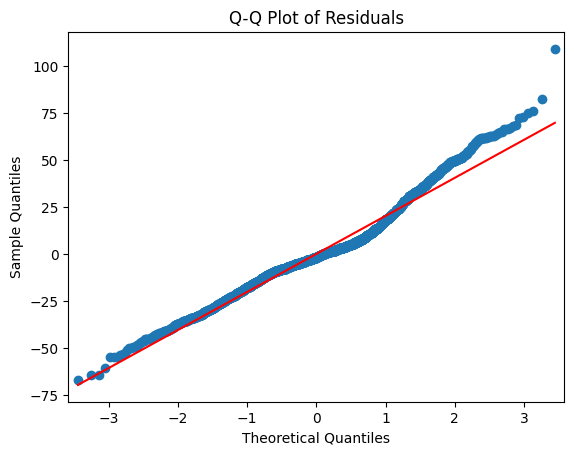

In [65]:
residuals = y_test - y_pred
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

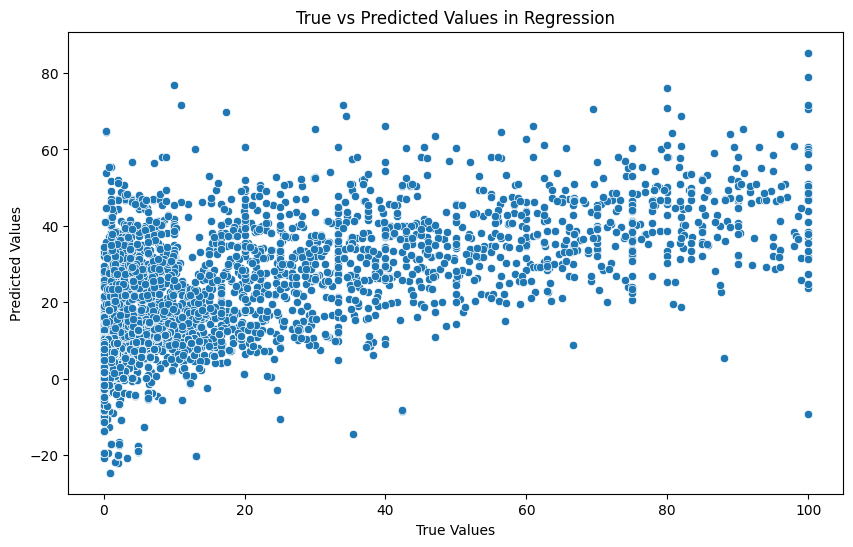

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('True vs Predicted Values in Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

The Root Mean Squared error will be used as the leaderboard score. The lower the RMSE, the better a model fits a dataset.

In [67]:
rmse = mean_squared_error(y_test, y_pred, squared=False) 
rmse

20.236721137711037

This is the RMSE to beat in this challenge ! Good luck !

## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. If it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event ***À MODIFIER*** [Coral bleaching](http://www.ramp.studio/events/tephra_datacamp2023). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/tephra_datacamp2023/sandbox) and copy-paste. You can also create a new folder `my_submission` in the `submissions` folder containing `regressor.py` and upload this file directly. You can check the starting-kit ([`regressor.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/tephra_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/tephra_datacamp2023/leaderboard) ***À METTRE À JOUR***) is the root mean squared error (`rmse`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [68]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  


class Regressor(BaseEstimator):
    def __init__(self):
        self.transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]
        )
        self.model = LinearRegression()  
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [69]:
!ramp-test --submission starting_kit

Testing Coral Bleaching Prediction
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score    rmse  Nrmse      time
	train  19.973  0.787  0.157392
	valid  20.856  0.813  0.007615
	test   20.701  0.794  0.006225
CV fold 1
	score    rmse  Nrmse      time
	train  20.196  0.786  0.043517
	valid  19.997  0.820  0.006302
	test   20.798  0.798  0.005799
CV fold 2
	score    rmse  Nrmse      time
	train  19.815  0.785  0.040358
	valid  21.466  0.822  0.014433
	test   20.723  0.795  0.012628
CV fold 3
	score    rmse  Nrmse      time
	train  19.961  0.795  0.073099
	valid  20.945  0.786  0.051383
	test   20.777  0.797  0.025186
CV fold 4
	score    rmse  Nrmse      time
	train  19.984  0.788  0.071246
	valid  20.854  0.812  0.039008
	test   20.842  0.799  0.024718
----------------------------
Mean CV scores
----------------------------
	score             rmse           Nrmse        time
	train  19.986 ± 0.1218  0.788 ± 0.0034  0.1 ± 0.04

## More information

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## Questions

Questions related to the starting kit should be asked on the [issue tracker](https://github.com/ramp-kits/tephra/issues).